In [1]:
# 올바른 결과를 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거친다.
# 전처리 과정을 거친 데이터로 훈련했을 떄의 차이를 알고
# 표준점수로 특성의 스케일을 변환 해보자.

# 만약 길이가 25cm이고 그 무게가 150g이면 도미인데, 방어로 결론이 나왔다.!!!
# 이 원인을 찾아보고 계산해보자.

# 전처리 데이터 앞쪽 35개는 도미(1), 14개는 빙어(0) -> 총 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
# 전에는 파이썬 리스트를 for문과 zip을 이용해서 배열로 만들었는데
# 넘파이는 이 기능이 내장되어 있는 메서드가 있다.
import numpy as np  # 넘파이 배열용 파이썬 라이브러리
np.column_stack([[1, 2, 3], [4, 5, 6]]) # .column(열) stack(쌓는다)
#                 길이용,    무게용 -> 변환

array([[1, 4],
       [2, 5],
       [3, 6]])

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))
# fish_data 변수에 2차원 배열을 넣는다 (앞쪽:길이, 뒤쪽:무게)
print(fish_data[:5]) # 앞쪽 5개를 미리보기 해본다. 0~4번 인덱스 확인

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [4]:
# target 1이면 도미, 0이면 빙어의 정답을 만들기 [1]*35 + [0]*14
# 정답파일을 생성한다.
print(np.ones(5)) # 1로 채우기 테스트

[1. 1. 1. 1. 1.]


In [5]:
print(np.zeros(10)) # 0으로 채우기 테스트

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
# .concatenate() 첫번째 차원을 따라 배열을 연결
# 1차원배열 (1이 35개;도미, 0이 14개:빙어)
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42
)

print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)
# stratify : 타겟값을 넣어줌(target의 class 비율을 유지한채 데이터셋을 split함)

(36, 2) (36,) (13, 2) (13,)


In [11]:
print(train_target)
# 훈련용 정답 데이터

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [13]:
print(test_target)
# 테스트용 검증 데이터 -> 결론 : 적절하게 분배됨
# ============= 전처리 데이터 ===========================끝

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
from sklearn.neighbors import KNeighborsClassifier # k-이웃 근접 알고리즘

kn = KNeighborsClassifier() # 객체 생성
kn.fit(train_input, train_target) # 훈련시작! (트레이닝입력, 트레이닝정답)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [15]:
kn.score(test_input, test_target) # 평가시작! (테스트입력, 테스트 정답)

1.0

In [16]:
print(kn.predict([[25, 150]]))

[0.]


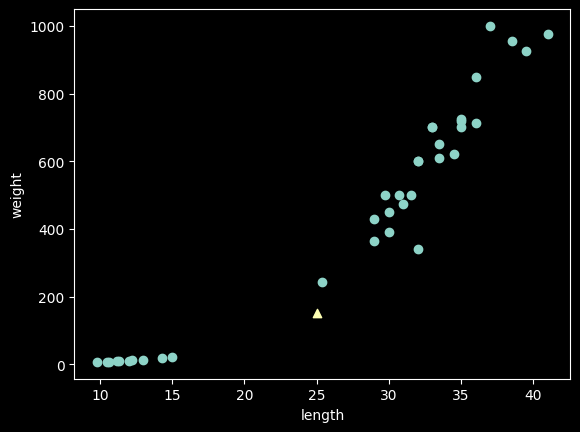

In [17]:
# 그래프로 확인해보자.

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^')
# 마커 종류 변경 https://pyvisuall.tistory.com/39
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

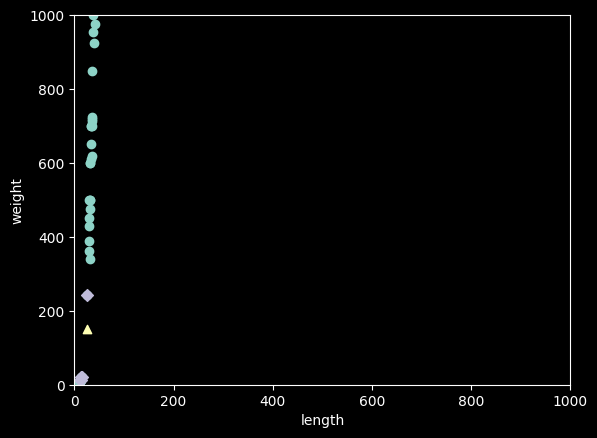

In [19]:
# 결론 x와 y축에 비율이 다르기에 정확한 그래프로 판단할 수 없다.
# k-최근접 이웃 알고리즘은 주변에 있는 5개를 보기 때문에 좀더 알아볼 필요가 있다.

distances, indexes = kn.kneighbors([[25, 150]])
# 내가 알고 싶은 값의 거리와 인덱스를 알아보자.
plt.scatter(train_input[:,0],train_input[:,1])  # 입력데이터 값
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.ylim((0, 1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [20]:
print(train_input[indexes]) # k-최근접 알고리즘에 근접한 5개의 값 (도미1, 빙어4)
# [[[ 25.4 242. ] -> 도미
#   [ 15.   19.9] -> 빙어
#   [ 14.3  19.7] -> 빙어
#   [ 13.   12.2] -> 빙어
#   [ 12.2  12.2] -> 빙어 ]] -> 그래서 0으로 결과가 나왔음.

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
